# CMPINF Final Project
## Evan Tall, Jerry Huang, Hailey Trampel

## How we ranked 'bestness':
Our approach to the project was to choose a neighborhood that contained aspects that  we thought were most important in a good neighborhood as well as what neighborhood contains features that make Pittsburgh unique. Our first dataset we chose was crime. We unanimously agreed on this because nobody likes crime and the less crime in a neighborhood the better. Secondly, we decided to use the public safety dataset. This data was similar to the crime data but we used the “crime per 100 persons (major crimes)” feature of this dataset. This was important because it shows which places in Pittsburgh have the most and least major crimes. The neighborhoods with the least major crimes are most desirable and therefore ranked at the top. Finally, we wanted a dataset that captured a key aspect of Pittsburgh. We chose the City of Pittsburgh bridges dataset. We chose this because we wanted a unique feature of Pittsburgh to be factored into our calculations. Since Pittsburgh has the most bridges in any city (446), it really is a city of bridges and this is a very cool aspect of Pittsburgh.
 



In [1]:
import pandas as pd
import numpy as np
import ssl

## Analyzing how safe the neighborhoods are
First, we imported the data for Pittsburgh Area arrests, as reported by the Pittsburgh Police.

In [2]:
pgh_crime_data = pd.read_csv("crime_data.csv")
crime_data = pgh_crime_data["INCIDENTNEIGHBORHOOD"].value_counts().sort_values(ascending=True)
crime_dict = {'Arrest Reports:': crime_data}
crime = pd.DataFrame(crime_dict)
crime.index.name = "Neighborhood"
crime.sort_index(axis = 0)

,Arrest Reports:
Neighborhood,
Allegheny Center,651
Allegheny West,75
Allentown,539
Arlington,168
Arlington Heights,100
Banksville,141
Bedford Dwellings,336
Beechview,686
Beltzhoover,313


In [7]:
crime_bad = pgh_crime_data["INCIDENTNEIGHBORHOOD"].value_counts()

In [3]:
public_safety_data = pd.read_csv('public_safety_data.csv')
safety=public_safety_data.sort_values(by = 'Part 1 Crime per 100 Persons (2010)', ascending=True)
safety_dict = safety[['Neighborhood','Part 1 Crime per 100 Persons (2010)']]
safety_df = pd.DataFrame(safety_dict)
safety_df.set_index('Neighborhood').sort_index(axis = 0)

,Part 1 Crime per 100 Persons (2010)
Neighborhood,
Allegheny Center,7.6
Allegheny West,8.2
Allentown,6.4
Arlington,2.7
Arlington Heights,7.8
Banksville,1.5
Bedford Dwellings,3.5
Beechview,2.4
Beltzhoover,4.3


## Counting the number of bridges per region

In [4]:
pgh_bridge_data = pd.read_csv("bridge_data.csv")
pgh_bridge_data["neighborhood"].value_counts()
bridge_data = pgh_bridge_data["neighborhood"].value_counts()
bridge_dict = {'Number of Bridges:': bridge_data}
bridges = pd.DataFrame(bridge_dict)
bridges.index.name = "Neighborhood"
bridges.sort_index(axis = 0)

,Number of Bridges:
Neighborhood,
Allegheny Center,2
Allegheny West,3
Allentown,1
Arlington,2
Banksville,1
Beechview,1
Bloomfield,1
Bluff,2
Bon Air,3


## Calculating the Best Using our Data

In [16]:
first = pd.concat([crime, bridges], axis=1, sort=False)
first.index.name = "Neighborhood"
mergedDf = first.merge(safety_df, left_index=True, right_on='Neighborhood')
mergedDf.set_index("Neighborhood", inplace = True)
mergedDf.sort_index(axis = 0)
mergedDf['arrestRank'] = mergedDf['Number of Bridges:']


mergedDf = mergedDf.replace(np.nan, 0)
rank = 1
realCounter = 0
previous = mergedDf.iloc[0]["Arrest Reports:"]
for index,row in mergedDf.iterrows():
    
    if(previous < mergedDf.iloc[realCounter]["Arrest Reports:"]):
        previous = mergedDf.iloc[realCounter]["Arrest Reports:"]
        rank += 1
    else:
        pass
    mergedDf.loc[index, "arrestRank"] = rank
    realCounter += 1
    
    
mergedDf['bridgesRank'] = mergedDf['Number of Bridges:']
mergedDf = mergedDf.replace(np.nan, 0)
mergedDf = mergedDf.sort_values(by=['Number of Bridges:'], ascending=False)
rank = 1
realCounter = 0
previous = mergedDf.iloc[0]["Number of Bridges:"]
for index,row in mergedDf.iterrows():
    
    if(previous > mergedDf.iloc[realCounter]["Number of Bridges:"]):
        previous = mergedDf.iloc[realCounter]["Number of Bridges:"]
        rank += 1
    else:
        pass
    mergedDf.loc[index, "bridgesRank"] = rank
    realCounter += 1

mergedDf['crimeRank'] = mergedDf['Part 1 Crime per 100 Persons (2010)']
mergedDf = mergedDf.replace(np.nan, 0)
mergedDf = mergedDf.sort_values(by=['Part 1 Crime per 100 Persons (2010)'], ascending=True)
rank = 1
realCounter = 0
previous = mergedDf.iloc[0]["Part 1 Crime per 100 Persons (2010)"]
for index,row in mergedDf.iterrows():
    
    if(previous < mergedDf.iloc[realCounter]["Part 1 Crime per 100 Persons (2010)"]):
        previous = mergedDf.iloc[realCounter]["Part 1 Crime per 100 Persons (2010)"]
        rank += 1
    else:
        pass
    mergedDf.loc[index, "crimeRank"] = rank
    realCounter += 1

total = 0
minNeigh = ""
counter = 0
for index,row in mergedDf.iterrows():
    if(counter == 0):
        total = int(mergedDf.iloc[counter]["arrestRank"])*15+int(mergedDf.iloc[counter]["bridgesRank"])*70+int(mergedDf.iloc[counter]["crimeRank"])*15
        minNeigh = index
    else:
        compare = int(mergedDf.iloc[counter]["arrestRank"])*15+int(mergedDf.iloc[counter]["bridgesRank"])*70+int(mergedDf.iloc[counter]["crimeRank"])*15
        if(compare < total):
            total = compare
            minNeigh = index
    counter += 1
print(minNeigh,"with a lowest score of", total, "is the best neighborhood in Pittsburgh.")
mergedDf

#if you change how much the having bridges matter it becomes oakwood otherwise it is new homestead.



Oakwood with a lowest score of 490 is the best neighborhood in Pittsburgh.


,Arrest Reports:,Number of Bridges:,Part 1 Crime per 100 Persons (2010),arrestRank,bridgesRank,crimeRank
Neighborhood,,,,,,
Fairywood,62,0.0,0.3,11.0,9.0,1.0
New Homestead,22,0.0,0.7,4.0,9.0,2.0
Lincoln Place,101,0.0,1.0,16.0,9.0,3.0
Summer Hill,45,0.0,1.2,9.0,9.0,4.0
Squirrel Hill North,151,1.0,1.3,29.0,8.0,5.0
Glen Hazel,69,0.0,1.4,12.0,9.0,6.0
Oakwood,44,5.0,1.4,8.0,4.0,6.0
Banksville,141,1.0,1.5,27.0,8.0,7.0
Stanton Heights,115,0.0,1.5,22.0,9.0,7.0


## The Best Neighborhood in Pittsburgh is... OAKWOOD
### Oakwood ranked:
* 6th for least arrests per year
* 14th for best public safety, based off of crime reports per person
* 4th for most bridges (tie)
  
This neighborhood was the only one that was in the top 20 of each of our categories. We decided 

### Before the Metric Was Applied:
Without the metric, Oakwood still ranks top 10. The visual below represents the sum of arrest reports, number of bridges, and major crime reports per 100 persons. 

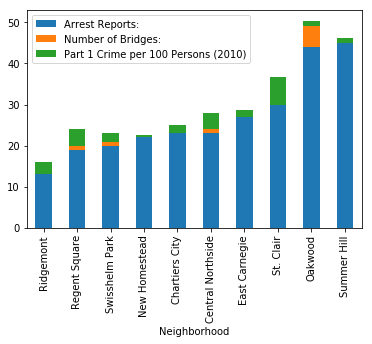

In [37]:
first = pd.concat([crime, bridges], axis=1, sort=False)
first.index.name = "Neighborhood"
merged = first.merge(safety_df, left_index=True, right_on='Neighborhood')
merged.set_index("Neighborhood", inplace = True)
mergeddd = merged.sort_values('Arrest Reports:', ascending=True)
mergeddd.head(10).plot.bar(stacked=True);

We believe that bridges are the most vital part to the ranking of the best neighborhood. Bridges are a unique characteristic of Pittsburgh and help build a sense of community throughout. Thus, we weighted bridges heavier than both safety and crime, but still took these into account as they are clearly necessary to how great a neighborhood is. Once they were weighted **Oakwood won by ____ points, having the best score.**